Test project:  co-occurrence of rain

In [288]:
import xarray as xr
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)


In [289]:
# import scipy.io as sio
# sio.loadmat('/home2/biasutti/datasets/servir/TRMM_2_pd_JS',mdict = 'TRMM',appendmat=True)  ##not working for  V7.3 files
import h5py

filepath = '/home2/biasutti/datasets/servir/TRMM_2_pd_JS.mat'
arrays = {}
f = h5py.File(filepath)
for k, v in f.items():
    arrays[k] = np.array(v)

In [290]:
arrays.keys()

dict_keys(['latd', 'lond', 'pd'])

In [291]:
pr = np.reshape(arrays['pd'],(92,17,69,168))
pr.shape  # just a numpy array

(92, 17, 69, 168)

In [292]:
lon = arrays['lond'].squeeze()
lat = arrays['latd'].squeeze()

In [293]:
delta = 4
cooccurrence = np.ones([len(lat),len(lon)])*np.nan
for i in range(delta,len(lat)-delta-1):
    for j in range(delta,len(lon)-delta-1):
        caz = np.ones([17,1])*np.nan
        for year in range(0,16):
            in1 = (pr[:,year,i,j]>=1)*1;  # boolean * 1 is integer
            if in1.sum()<10:
                caz[year] = np.nan
            else:
                in2 = (pr[:,year,i-delta:i+delta+1,j-delta:j+delta+1]>=1)*1
                in1 = np.tile(in1[:,np.newaxis,np.newaxis],[1,2*delta+1,2*delta+1])
                tmp = np.equal(in1,in2)*1
                caz[year]=np.nansum(tmp)/92/(2*delta+1)/(2*delta+1)
                #print(caz)
        cooccurrence[i,j] = np.nanmean(caz)
        

/home2/biasutti/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater_equal
  # This is added back by InteractiveShellApp.init_path()
/home2/biasutti/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()


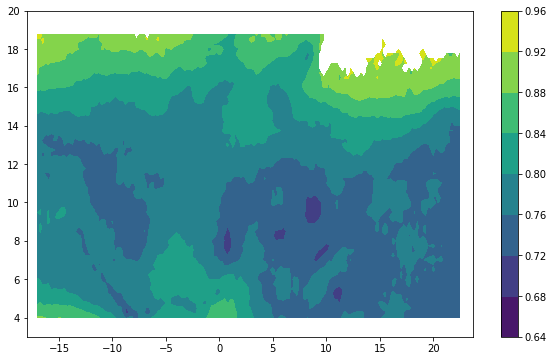

In [233]:
cooccurrence.shape
plt.contourf(lon,lat,cooccurrence)
plt.colorbar()

In [294]:
dates = pd.date_range(start='2000-07-01', end='2000-09-30', freq='D')
#dates = np.array([range(P.shape[0])]).squeeze()
type(dates)
dates.shape


(92,)

In [295]:
list(range(1998,2015))

[1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014]

In [296]:
da_trmm = xr.DataArray(pr, dims=['day','year','lat', 'lon'],
                           coords={'year':list(range(1998,2015)),'day':dates,'lat': lat,
                                   'lon':lon })

In [297]:
field = da_trmm.sum(dim = 'day')
field

<xarray.DataArray (year: 17, lat: 69, lon: 168)>
array([[[6.722249e+01, 6.136499e+01, ..., 6.609592e+02, 5.893559e+02],
        [1.098450e+02, 1.107600e+02, ..., 7.154809e+02, 6.699799e+02],
        ...,
        [3.562500e+01, 3.605249e+01, ..., 3.752113e+01, 1.550373e+01],
        [3.014249e+01, 3.318749e+01, ..., 1.892600e+01, 1.963338e+01]],

       [[6.869249e+01, 7.732498e+01, ..., 5.644694e+02, 5.683331e+02],
        [6.540749e+01, 9.324748e+01, ..., 4.976997e+02, 5.048589e+02],
        ...,
        [2.087250e+01, 2.142749e+01, ..., 4.173612e+01, 5.163450e+01],
        [1.199250e+01, 1.400250e+01, ..., 6.591978e+01, 8.653503e+01]],

       ...,

       [[1.261200e+02, 1.537500e+02, ..., 4.147260e+02, 4.575573e+02],
        [1.706250e+02, 1.821150e+02, ..., 3.728120e+02, 3.893444e+02],
        ...,
        [5.984999e+00, 5.392499e+00, ..., 2.757217e+01, 2.662488e+01],
        [8.339998e+00, 4.657499e+00, ..., 1.201678e+01, 1.087174e+01]],

       [[1.964925e+02, 1.949250e+02, ...,

In [ ]:
def match_neighbors(field, deltax=4, deltay=4):
    """ checks how well a time series at one gridpoint matches the neighboring ones. It assumes (time,y,x) """
    
    field_exy = np.concatenate([field[:,-deltay:-1,:]*np.nan, field, field[:,0:deltay-1,:]*np.nan],axis = 1)
    field_extend = np.concatenate([field_exy[:,:,-deltax:-1]*np.nan, field_exy, field_exy[:,:,0:deltax-1]*np.nan],axis = 2)
    

In [302]:
deltay = 4; deltax = 4;
np.concatenate

4

In [303]:
field_exy = np.concatenate([field[:,-deltay:-1,:]*np.nan, field, field[:,0:deltay-1,:]*np.nan],axis = 1)
field_extend = np.concatenate([field_exy[:,:,-deltax:-1]*np.nan, field_exy, field_exy[:,:,0:deltax-1]*np.nan],axis = 2)

In [304]:
field_extend


array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan

In [284]:
product?


Object `product` not found.


In [285]:
zip?


Init signature: zip(self, /, *args, **kwargs)
Docstring:     
zip(iter1 [,iter2 [...]]) --> zip object

Return a zip object whose .__next__() method returns a tuple where
the i-th element comes from the i-th iterable argument.  The .__next__()
method continues until the shortest iterable in the argument sequence
is exhausted and then it raises StopIteration.
Type:           type


In [286]:
product(range(5),range(7))

NameError: name 'product' is not defined